# EDA on Haberman Dataset on Cancer Survival

Data Description:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:
    Age of patient at time of operation (numerical)
    Patient's year of operation (year - 1900, numerical)
    Number of positive axillary nodes* detected (numerical)
    Survival status (clas    s attribute)
    1 = the patient survived 5 ye    ars or longer
    2 = the patient died within 5 year

Missing Attribute Values: None

*Positiv    e axillary nodes 

A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to whic    h     cancer has spread.

Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of         the cancer spreading.

When lymph nodes are free, or clear, of cancer, the test results are negative. If lymph nodes have some cancer cells in them, they are called positive. Your pathology report will tell you how many lymph nodes were removed, and of those, how many tested positive for the pr    e    sence of cancer cells. 

The more lymph nodes that contain cancer cells, the more se    r    ious the cancer might be.

When breast cancer is found in the lymph nodes, it means that cancer has spread from the primary tumor and is at least stage 2. Lymph node involvement is an important part of staging and in determining which treatments are most likely to be effective.


Objective : To find whether a patient will survive 5 years or more after operation for breast cancer.5 years

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../dataset/haberman.csv")

In [4]:
#finding size of dataset
df.shape

(305, 4)

The dataset has 306 rows and 4 columns. Each row contains the information of a patient.

In [7]:
#listing the column titles
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

There is no title for the dataset, adding title to the columns

In [8]:
#Adding column titles
df.columns = ['age','year','nodes','status'] 

In [9]:
#first 5 rows of the dataframe
df.head()

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [10]:
#further information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


All numeric fields, there are no null values.

In [11]:
 df.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Age of patients range from 30 - 83. The average age of patients in this dataset is 53. The study is conducted in 1958 - 1969. Most of the patients are of the range 44-61. Positive axilliary lymph nodes are present in the range of 0 - 52. 

In [12]:
#Checking the class labels
df['status'].unique()

array([1, 2], dtype=int64)

There are two unique values in status class 1 and 2. 
1: patient survived 5 years or more
2: patient died within 5 years

In [14]:
#checking whether the data is balanced or imbalanced
df['status'].value_counts()

status
1    224
2     81
Name: count, dtype: int64

Dataset is an imbalanced one as the class 'status' is not uniform in distribution and has a high number of patients who survived 5 years or longer.

# Univariate analysis

Univariate Analysis is a type of data visualization where we visualize only a single variable at a time.

Lets first plot the three features and plot them to analyse the data

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

The distribution plot is suitable for comparing range and distribution for groups of numerical data. 

C:\Roshni\MLcode\mlenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


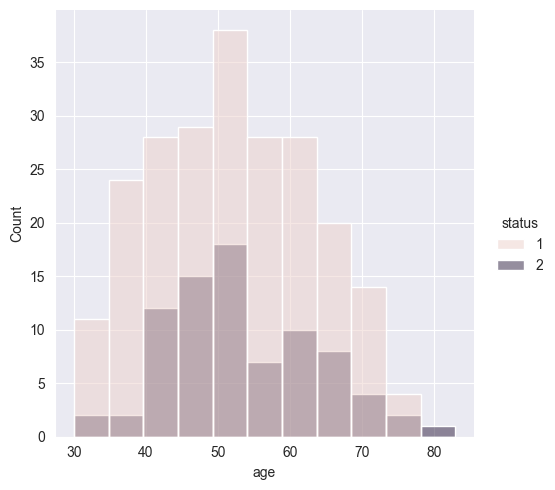

In [36]:
sns.displot(data = df, x = 'age',hue = 'status')

More Patients are of age 49-54. They also have the highest survival rate.

C:\Roshni\MLcode\mlenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


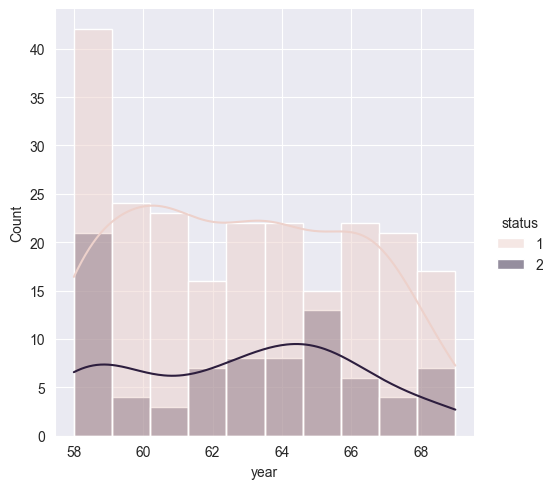

In [37]:
sns.displot(data = df, x = 'year', hue = 'status', kde="True")

More operations are done in 1958-59. Of those operations the patients who survived for more than 5 years is high.

C:\Roshni\MLcode\mlenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


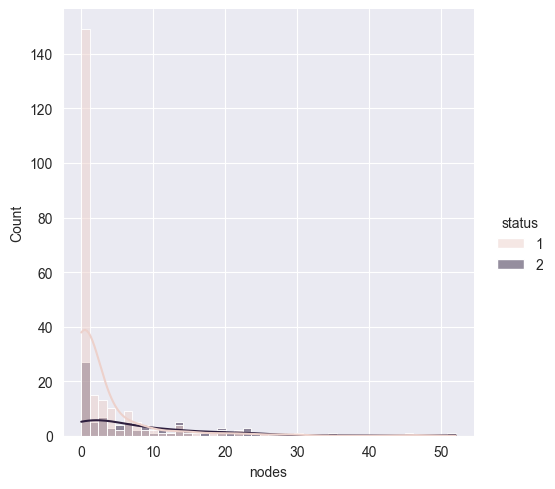

In [38]:
sns.displot(data = df, x = 'nodes', hue = 'status', kde="True")

Patients with 0-1 nodes are the most. Their survival rate is also high.

We can understand that more patients survived more than 5 years after the surgery. Lesser the number of nodes, the survival chances of more than five years is high. But most of the features are not giving much insights on the death rate except nodes. Age and year values rise proportional to the number of patients.

In [39]:
#Plotting cummulative density function to find the percentage of patients affected by the features

<Axes: xlabel='age', ylabel='Proportion'>

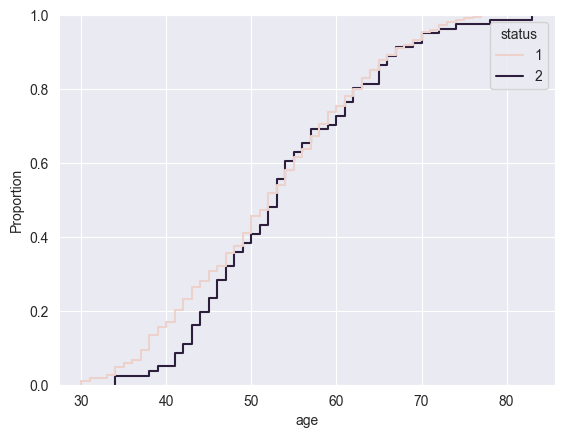

In [40]:
sns.ecdfplot(data=df, x="age", hue="status")

95% of patients are of age less than 70

<Axes: xlabel='nodes', ylabel='Proportion'>

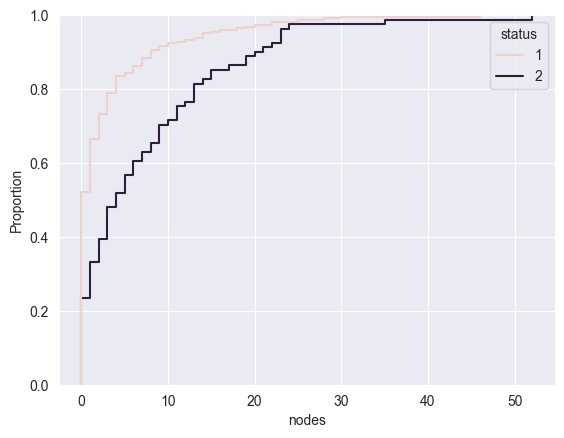

In [41]:
sns.ecdfplot(data=df, x="nodes", hue="status")

If nodes <5, 80% of the patients are survived for more than 5 years after the surgery. There is 5% of chances to survive if the number of nodes > 20

<Axes: xlabel='year', ylabel='Proportion'>

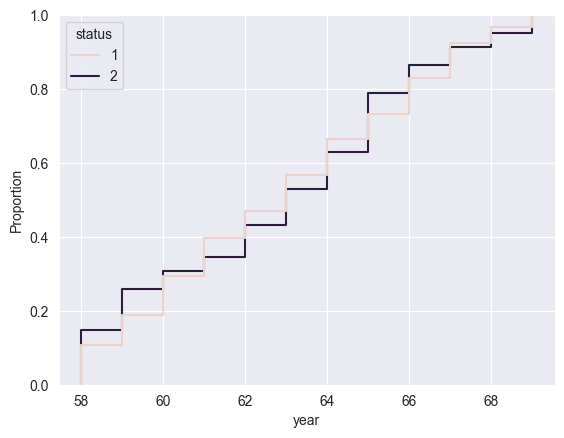

In [42]:
sns.ecdfplot(data=df, x="year", hue="status")

In [43]:
#Now lets look into the data by plotting using boxplots and violin plots

Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.

<Axes: xlabel='status', ylabel='age'>

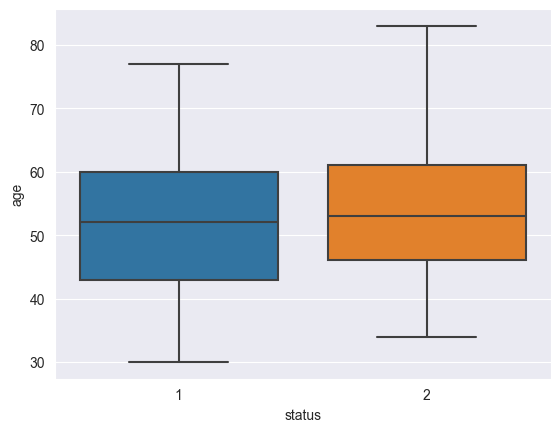

In [44]:
sns.boxplot(x='status',y='age', data=df)

<Axes: xlabel='status', ylabel='year'>

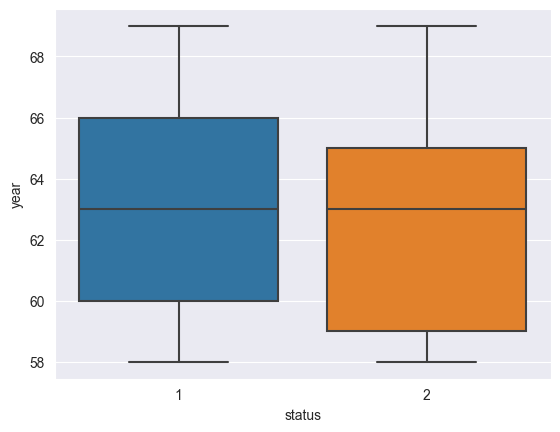

In [45]:
sns.boxplot(x='status',y='year', data=df)

<Axes: xlabel='status', ylabel='nodes'>

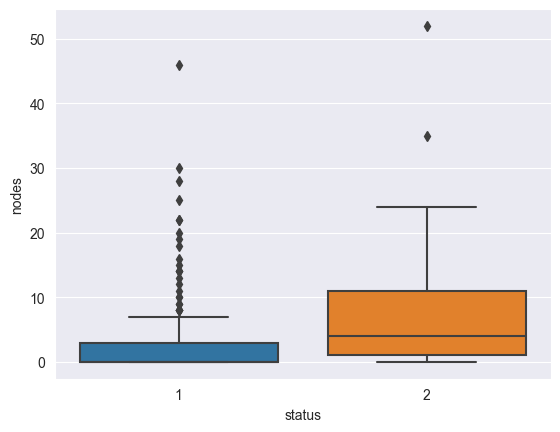

In [46]:
sns.boxplot(x='status',y='nodes', data=df)

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

<Axes: xlabel='status', ylabel='age'>

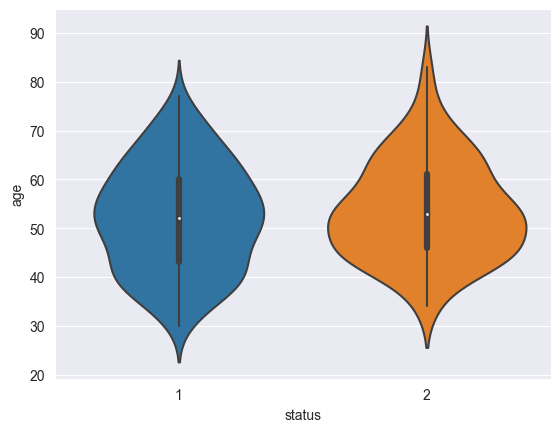

In [47]:
sns.violinplot(x="status", y="age", data=df, size=8)

<Axes: xlabel='status', ylabel='year'>

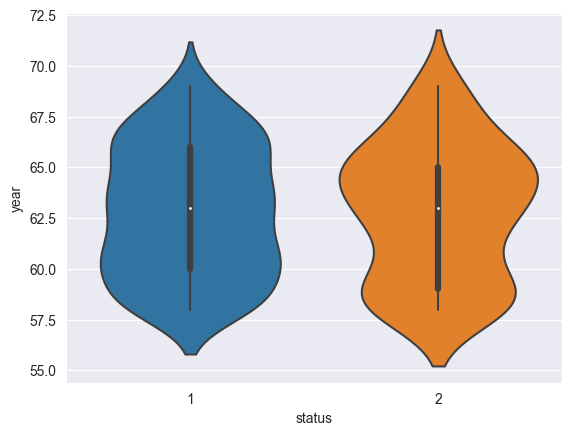

In [48]:
sns.violinplot(x="status", y="year", data=df, size=8)

<Axes: xlabel='status', ylabel='nodes'>

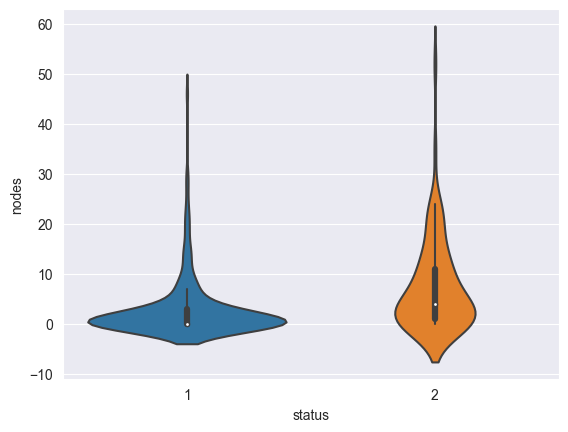

In [49]:
sns.violinplot(x="status", y="nodes", data=df, size=8)

No new information we got from box and violin plots

# Bivariate Analysis

Bivariate analysis is an analysis of two variables to determine the relationships between them.

<Axes: xlabel='age', ylabel='nodes'>

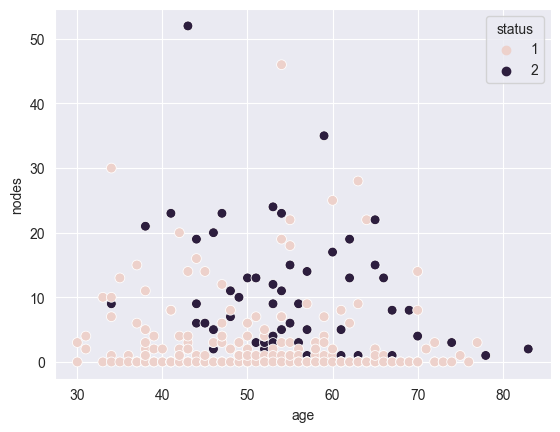

In [50]:
sns.scatterplot(data=df, x="age", y="nodes", hue="status",s=50)

More patients with one node survived. 

In [51]:
df[(df['nodes']<7) & (df['age']<65) & (df['status']==1)]

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
5,33,60,0,1
...,...,...,...,...
249,63,66,0,1
252,64,58,0,1
254,64,66,0,1
255,64,61,0,1


f nodes < 7 and age < 65 more patients survived. The dataset has information about 224 patients who survived after surgery out of which 162 are having age < 65 and nodes < 7. Its nearly 73% of the total survivals. Also there is less death before 5 years if age<40

<Axes: xlabel='year', ylabel='nodes'>

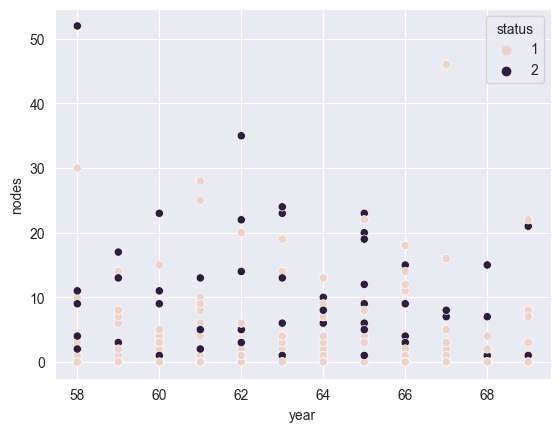

In [52]:
sns.scatterplot(data=df, x="year", y="nodes", hue="status")

<Axes: xlabel='age', ylabel='year'>

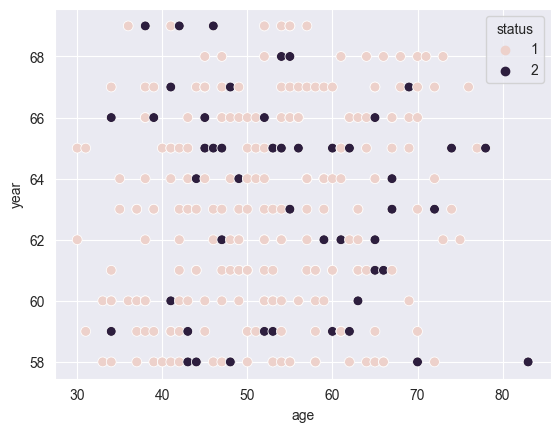

In [53]:
sns.scatterplot(data=df, x="age", y="year", hue="status",s=50)

C:\Roshni\MLcode\mlenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


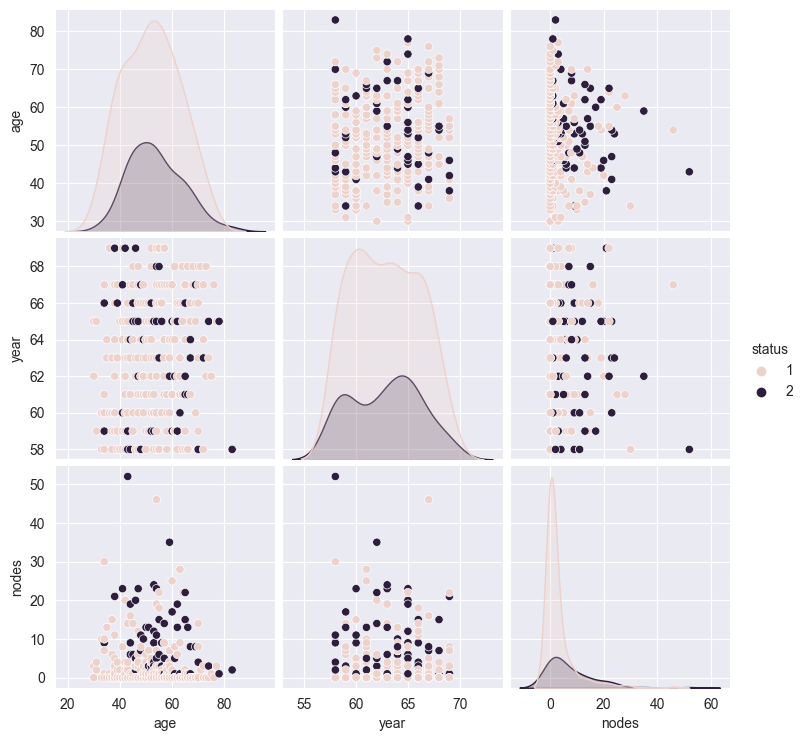

In [54]:
sns.pairplot(df, hue="status")

Age and nodes give a more clear picture of the survival rate than other combinations.

# Conclusions

The age of the patient range from 30-83
Year of operations range from 1958-1970
Nodes range from 0 - 52

The most prominent feature of the whole feature list is nodes.
    -If number of nodes is less than 5 more than 80% of the patients survived for more than 5 years.
    -If number of nodes is greater than 20, less than 5% chances are there to survive more than five years.
    -Lesser the number of nodes, greater the survival rate

The next important feature is age.
    - If age is less than 40, there is only 5% chances that the person has an early death

If we take a combination of the features age and nodes, its clear that a patient with age<65 and nodes<7 has 73% chances of survival for more than 5 years